In [1]:
include("package.jl")
include("kagome_setup.jl")
include("KH_hamiltonian.jl")
include("ED_Thermal.jl")

entropy (generic function with 1 method)

In [2]:
include("Full_Orthogonalization_Lanczos.jl")

BLM_old (generic function with 3 methods)

In [10]:
"""Test code"""
θ = 0.2
J = cospi(θ) * ones(3)
K = sinpi(θ) * ones(3)

la = Lattice(1,2)
N = sitenum(la)
dim = dimension(la)

Hk = Kitaev(K, la)
Hh = Heisenberg(J, la)
Htot = Hk + Hh;

println("Finish set Hamiltonian")

Finish set Hamiltonian


In [11]:
# Full ED
Hdense  = Array(Htot)
e,x = eigen(Hdense)
println("Finish diagonalize K-H model!")

#for i = 1:dim
#    println("i= ",i," sum= ", e[i])
#end

Finish diagonalize K-H model!


In [12]:
include("Kagome-FTLM.jl")
Random.seed!();

In [19]:
"""Random Sampling + Full ED"""
function FTEDvec(eval::AbstractVector, evec::AbstractMatrix, R::Integer)
    """Partition Function by the Finite Temperature ED: eigen(val, vec) provided
       Input: eval := Eigen-value vector
              evec := Eigen-vector matrix
              R := The number of random sampling
              Op := A general operator
        Output: V := [E(rj),  <v psi>*<psi v>, <v psi>*<psi O v>]
                dim/R
    """
    dim = size(eval)[1];  n = 2;
    V = zeros(R, dim, n)
    Random.seed!()
    for r = 1:R
        v0 = random_init(dim)
        emin = minimum(eval)
        for j = 1:dim
            V[r,j,1] = eval[j] - emin
            V[r,j,2] = v0' * evec[:,j] * evec[:,j]' * v0
        end
    end
    return V, dim/R      
end

FTEDvec

In [23]:
R = 500
V, fac = FTEDvec(e, x, R);

In [21]:
sum50 = zeros(dim)
for r = 1:R
    sum50 += V[r,:,2]
end
sum50 = sum50 * dim/R;

In [24]:
sum500 = zeros(dim)
for r = 1:R
    sum500 += V[r,:,2]
end
sum500 = sum500 * dim/R;

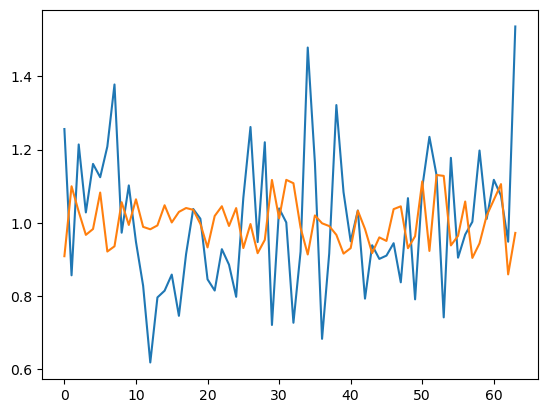

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000238DF388>

In [25]:
plot(sum50)
plot(sum500)
#xlim(1,20)
#ylim(0,2)

In [27]:
""" ED Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Z = zeros(step)
E = zeros(step)
C = zeros(step)
S = zeros(step)

#println(Z)
for i = 1: step
    t = temp[i]
    Z[i] += partitian(t, e)
    E[i] += energy(t,e)
    C[i] += specific_heat(t,e)
    #S[i] += E[i]/t +log(Z[i])
    S[i] += log(Z[i])
end

println("ed: Finish calculate Thermaldynamic quanties!")

ed: Finish calculate Thermaldynamic quanties!


In [26]:
""" Thermaldynamic quanties"""
step = 100
temp = [10^x for x in LinRange(-4,2,step)]
Zt = zeros(step)
Et = zeros(step)
Ct = zeros(step)
St = zeros(step)

for i = 1: step
    t = temp[i]
    Zt[i] = FTLM_partition(V, fac, t)
    Et[i], Ct[i] = FTLM_EandC(V, fac, t)
    St[i] = Et[i]/t + log(Zt[i])
end

println("ftlm: Finish calculate Thermaldynamic quanties!")

ftlm: Finish calculate Thermaldynamic quanties!


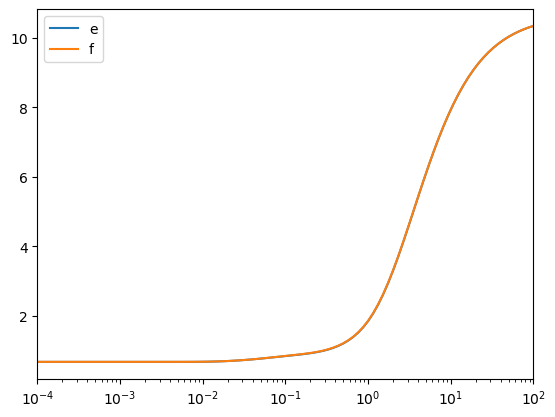

(0.00010000000000000005, 100)

In [28]:
#println(length(C))
#println(C)
semilogx(temp, Z/N)
semilogx(temp, Zt/N)
legend("ef")
xlim(10^-4, 10^2)

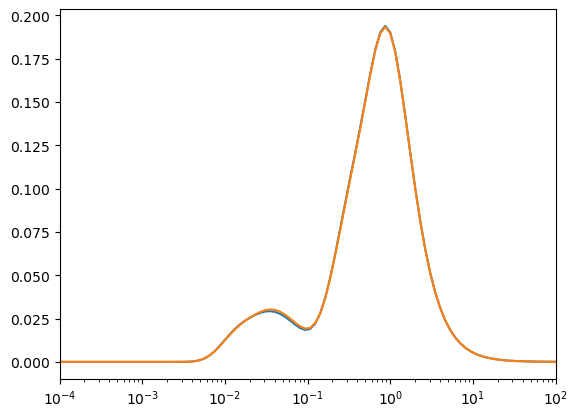

(0.00010000000000000005, 100)

In [29]:
semilogx(temp, C/N)
semilogx(temp, Ct/N)
xlim(10^-4, 10^2)

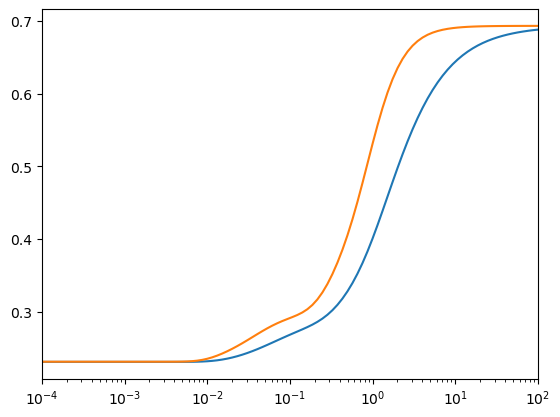

(0.00010000000000000005, 100)

In [31]:
semilogx(temp, S/N)
semilogx(temp, St/N)
xlim(10^-4, 10^2)

In [76]:
A = [1,2,3] 
B = [1,0,0]

3-element Array{Int64,1}:
 1
 0
 0

In [79]:
(A'* B) * (B' * A)

1

In [36]:
sum = 0
for r = 1:1000
    sum += V[r,1,2]
end
println(sum * dim / 1000)

0.15161173700851546


In [2]:
function random_init(N::Int) 
    vr = 2 * rand(Float64, N) - ones(N)
    vr = vr/norm(vr)
    return vr
end

function random_init2(N::Int) 
    vr = ones(N)/sqrt(N) + (rand(Float64, N) .- 0.5)
    vr = vr/norm(vr)
    return vr
end

random_init2 (generic function with 1 method)

In [3]:
random_init(5)

5-element Array{Float64,1}:
 -0.868242767241665  
 -0.10616125998446954
  0.3062984062933352 
  0.12228808345811464
 -0.3551213805973248 

In [9]:
R = 100
B = zeros(5)
for r = 1:R
    B += random_init(5)
end

println(B * 5/R)

[0.0564675, -0.144498, 0.0271553, -0.409904, 0.218988]
